In [1]:
CONSTRAINT_TOOLS = '/scratch/ucgd/lustre-work/quinlan/u6018199/constraint-tools'
CONSTRAINT_TOOLS_DATA = '/scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools'

import sys
sys.path.append(f'{CONSTRAINT_TOOLS}/utilities')

## Compute Gnocchi, and B-values for a set of windows that do or do not overlap enhancers


In [2]:
import pandas as pd

pd.set_option('display.max_columns', 50)

def get_chen_windows_with_enhancers_exons():
  # the following bed file was produced by experiments/germline-model/chen-et-al-2022/Fig_2a.Nonly.noisy.ipynb
  filename = f'{CONSTRAINT_TOOLS_DATA}/benchmark-genome-wide-predictions/chen-et-al-2022/mchale.kmerSizes.trainSets.noisy.enhancer-exon.bed'
  df = pd.read_csv(filename, sep='\t')
  df = df[['chromosome', 'start', 'end', 'enhancer overlap', 'merged_exon overlap', 'window overlaps enhancer', 'window overlaps merged_exon']]
  df = df.rename(columns={
    'chromosome': 'chrom'
  })
  return df

get_chen_windows_with_enhancers_exons()

,chrom,start,end,enhancer overlap,merged_exon overlap,window overlaps enhancer,window overlaps merged_exon
0,chr1,1432000,1433000,1000.0,NaN,True,False
1,chr1,1435000,1436000,1000.0,444.0,True,True
2,chr1,1449000,1450000,NaN,311.0,False,True
3,chr1,1450000,1451000,NaN,758.0,False,True
4,chr1,1451000,1452000,NaN,NaN,False,False
...,...,...,...,...,...,...,...
1786072,chr9,137269000,137270000,1000.0,NaN,True,False
1786073,chr9,137275000,137276000,712.0,NaN,True,False
1786074,chr9,137282000,137283000,572.0,641.0,True,True
1786075,chr9,137290000,137291000,NaN,NaN,False,False


In [3]:
def get_chen_windows_with_gnocchi_B(): 
  # experiments/germline-model/chen-et-al-2022/Chen_models_SNV_counts_best_for_most_frequent_Bwindows.ipynb
  filename = f'{CONSTRAINT_TOOLS_DATA}/chen-et-al-2023-published-version/41586_2023_6045_MOESM4_ESM/Supplementary_Data_2.gnocchi.bmap.gnocchi_BGS_corrected_naive.bed'
  df = pd.read_csv(filename, sep='\t')
  df = df[['chrom', 'start', 'end', 'gnocchi', 'N_expected', 'N_observed', 'B']]
  return df 

get_chen_windows_with_gnocchi_B()

,chrom,start,end,gnocchi,N_expected,N_observed,B
0,chr1,1432000,1433000,4.299894,338.059552,259,0.653
1,chr1,1435000,1436000,3.331645,333.876799,273,0.652
2,chr1,1449000,1450000,1.817267,253.960193,225,0.652
3,chr1,1450000,1451000,1.365863,337.076763,312,0.652
4,chr1,1451000,1452000,0.666316,302.590657,291,0.652
...,...,...,...,...,...,...,...
1605781,chr9,137269000,137270000,5.276351,300.458958,209,0.536
1605782,chr9,137275000,137276000,2.687348,339.517045,290,0.536
1605783,chr9,137282000,137283000,-0.090791,208.688422,210,0.536
1605784,chr9,137290000,137291000,2.162811,257.721105,223,0.536


In [4]:
def get_chen_windows_with_all_features(): 
  df = get_chen_windows_with_enhancers_exons()
  df = df.merge(get_chen_windows_with_gnocchi_B(), on=['chrom', 'start', 'end'], how='inner')
  return df 

WINDOWS = get_chen_windows_with_all_features()
WINDOWS 

,chrom,start,end,enhancer overlap,merged_exon overlap,window overlaps enhancer,window overlaps merged_exon,gnocchi,N_expected,N_observed,B
0,chr1,1432000,1433000,1000.0,NaN,True,False,4.299894,338.059552,259,0.653
1,chr1,1435000,1436000,1000.0,444.0,True,True,3.331645,333.876799,273,0.652
2,chr1,1449000,1450000,NaN,311.0,False,True,1.817267,253.960193,225,0.652
3,chr1,1450000,1451000,NaN,758.0,False,True,1.365863,337.076763,312,0.652
4,chr1,1451000,1452000,NaN,NaN,False,False,0.666316,302.590657,291,0.652
...,...,...,...,...,...,...,...,...,...,...,...
1597324,chr9,137269000,137270000,1000.0,NaN,True,False,5.276351,300.458958,209,0.536
1597325,chr9,137275000,137276000,712.0,NaN,True,False,2.687348,339.517045,290,0.536
1597326,chr9,137282000,137283000,572.0,641.0,True,True,-0.090791,208.688422,210,0.536
1597327,chr9,137290000,137291000,NaN,NaN,False,False,2.162811,257.721105,223,0.536


## Gnocchi differentiates non-exonic windows that do/don't overlap enhancers less when background selection is stronger (smaller B)

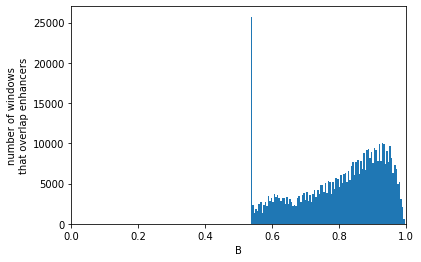

<ipython-input-5-6aa7dfaf07c9>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_B_bin['gnocchi_quantile'] = pd.qcut(df_B_bin['gnocchi'], q=number_of_gnocchi_quantiles, labels=False)


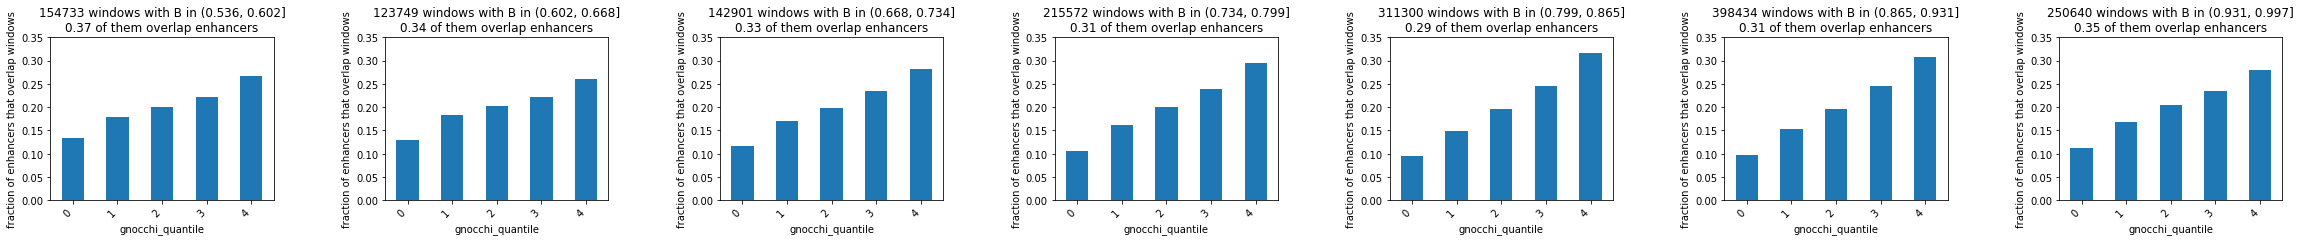

In [5]:
import matplotlib.pyplot as plt
from aggregate import aggregate

def plot_enhancer_fraction_distribution(df, number_B_bins=7, number_of_gnocchi_quantiles=5, ymax=0.35): 
  df = df.copy()

  df[df['window overlaps enhancer']].plot.hist(y='B', bins=100, title=None, legend=False)
  plt.xlabel('B')
  plt.ylabel('number of windows\nthat overlap enhancers')
  plt.xlim(0, 1)
  plt.show()

  df['B_bin'] = pd.cut(df['B'], bins=number_B_bins)

  plt.rcParams.update({
    'font.size': 10,
  })
  fig, axs = plt.subplots(1, number_B_bins, figsize=(40, 3))
  plt.subplots_adjust(wspace=0.5)

  for i, B_bin in enumerate(sorted(df['B_bin'].unique())): 
    df_B_bin = df[df['B_bin'] == B_bin]
    number_of_windows_overlapping_enhancers = df_B_bin['window overlaps enhancer'].sum()

    df_B_bin['gnocchi_quantile'] = pd.qcut(df_B_bin['gnocchi'], q=number_of_gnocchi_quantiles, labels=False)
    df_B_bin_aggregated = aggregate(
      df_B_bin, 
      group_columns = ['gnocchi_quantile'],
      aggregation_functions = {
        'window overlaps enhancer': ['sum'],
        'B': ['count']
      }
    )
  
    df_B_bin_aggregated['fraction of enhancers that overlap windows'] = df_B_bin_aggregated['sum window overlaps enhancer'] / number_of_windows_overlapping_enhancers
    df_B_bin_aggregated.plot.bar(x='gnocchi_quantile', y='fraction of enhancers that overlap windows', ax=axs[i], legend=False)
    axs[i].set_title(
      f'{len(df_B_bin)} windows with B in {B_bin}\n'
      f'{number_of_windows_overlapping_enhancers/len(df_B_bin):.2f} of them overlap enhancers'
    )
    axs[i].set_ylabel('fraction of enhancers that overlap windows')
    axs[i].set_ylim(0, ymax)
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45, ha='right')  

plot_enhancer_fraction_distribution(WINDOWS)

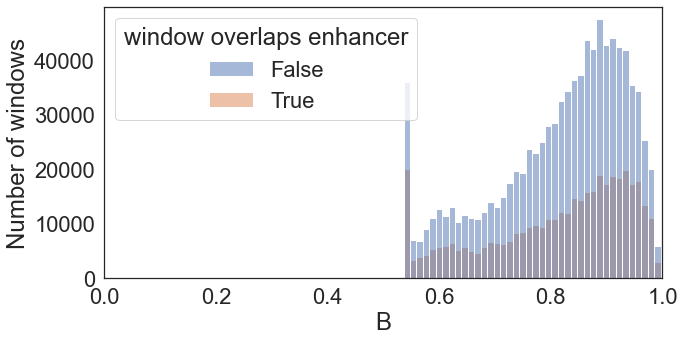

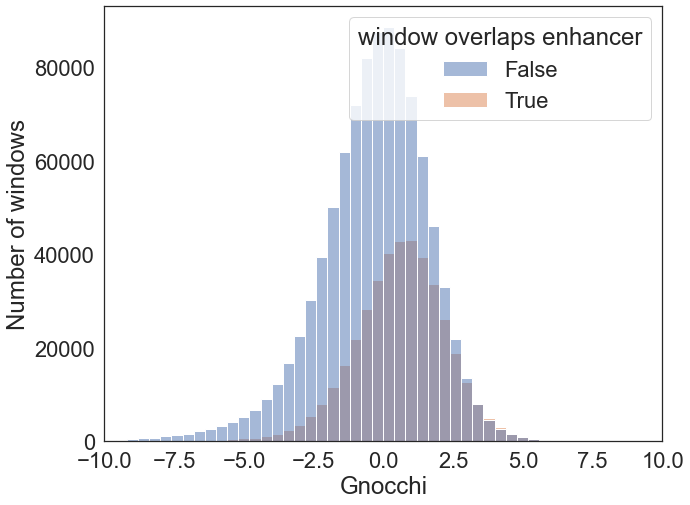

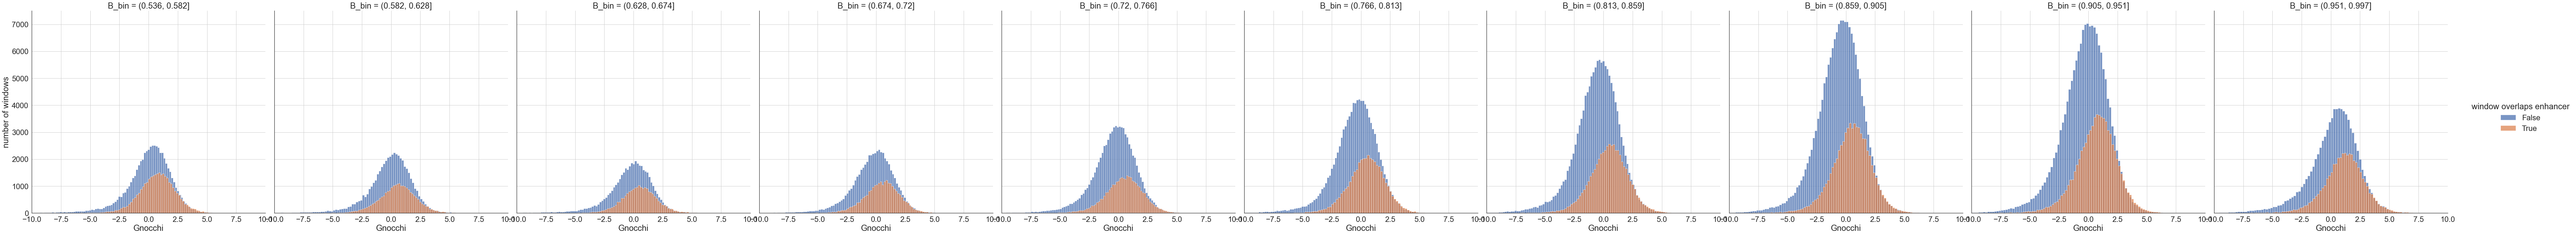

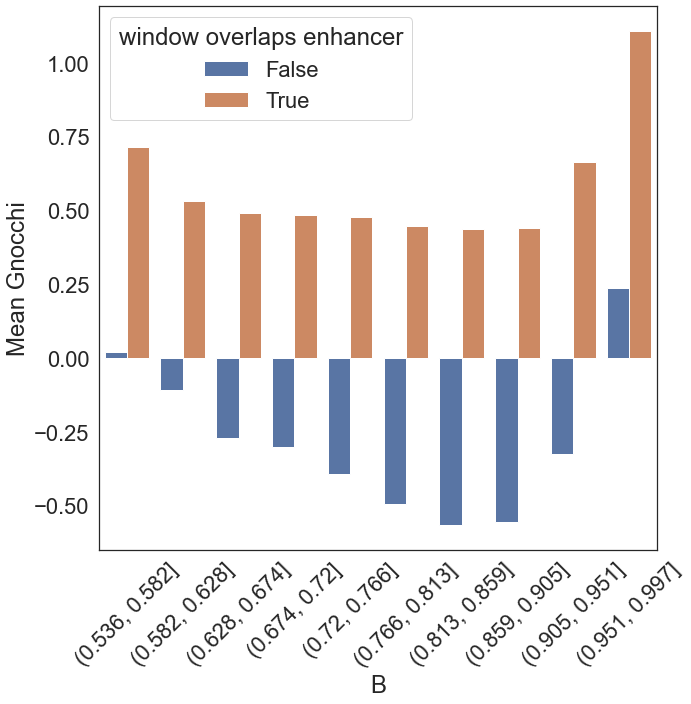

In [7]:
import matplotlib as mpl
import numpy as np

mpl.rcParams['font.size'] = 20
plt.rcParams['figure.figsize'] = (10, 10)

import seaborn as sns

sns.set_theme(style='white', font_scale=2)

def plot_Gnocchi_and_B(df, number_B_bins): 
  df = df.copy() 

  df = df[df['window overlaps merged_exon'] == False] # strictly non-exonic windows

  df['B_bin'] = pd.cut(df['B'], bins=number_B_bins)

  plt.figure(figsize=(10, 5))
  sns.histplot(data=df, x='B', hue='window overlaps enhancer', bins=40)
  plt.xlim(0, 1)
  plt.ylabel('Number of windows')

  plt.figure(figsize=(10, 8))
  sns.histplot(data=df, x='gnocchi', hue='window overlaps enhancer', bins=50)
  plt.xlabel('Gnocchi')
  plt.ylabel('Number of windows')
  plt.xlim(-10, 10)
  plt.show()

  g = sns.FacetGrid(df, col='B_bin', hue='window overlaps enhancer', height=10, aspect=1)
  g.map(sns.histplot, 'gnocchi', stat='count', common_bins=True, bins=100)
  g.set_ylabels("number of windows")
  g.set_xlabels('Gnocchi')
  g.add_legend()
  g.set(xlim=(-10, 10))

  # Show grid on each facet
  for ax in g.axes.flatten():
    ax.grid(True)  

  plt.show()

  df_aggregated = aggregate(
    df, 
    group_columns = ['B_bin', 'window overlaps enhancer'],
    aggregation_functions = {
      'gnocchi': [np.mean],
    }
  )
  plt.figure(figsize=(10, 10))
  sns.barplot(data=df_aggregated, x='B_bin', y='mean gnocchi', hue='window overlaps enhancer')
  plt.xlabel('B')
  plt.ylabel('Mean Gnocchi')
  plt.xticks(rotation=45)
  plt.show()

plot_Gnocchi_and_B(WINDOWS, number_B_bins=10)

## Baseline classifier

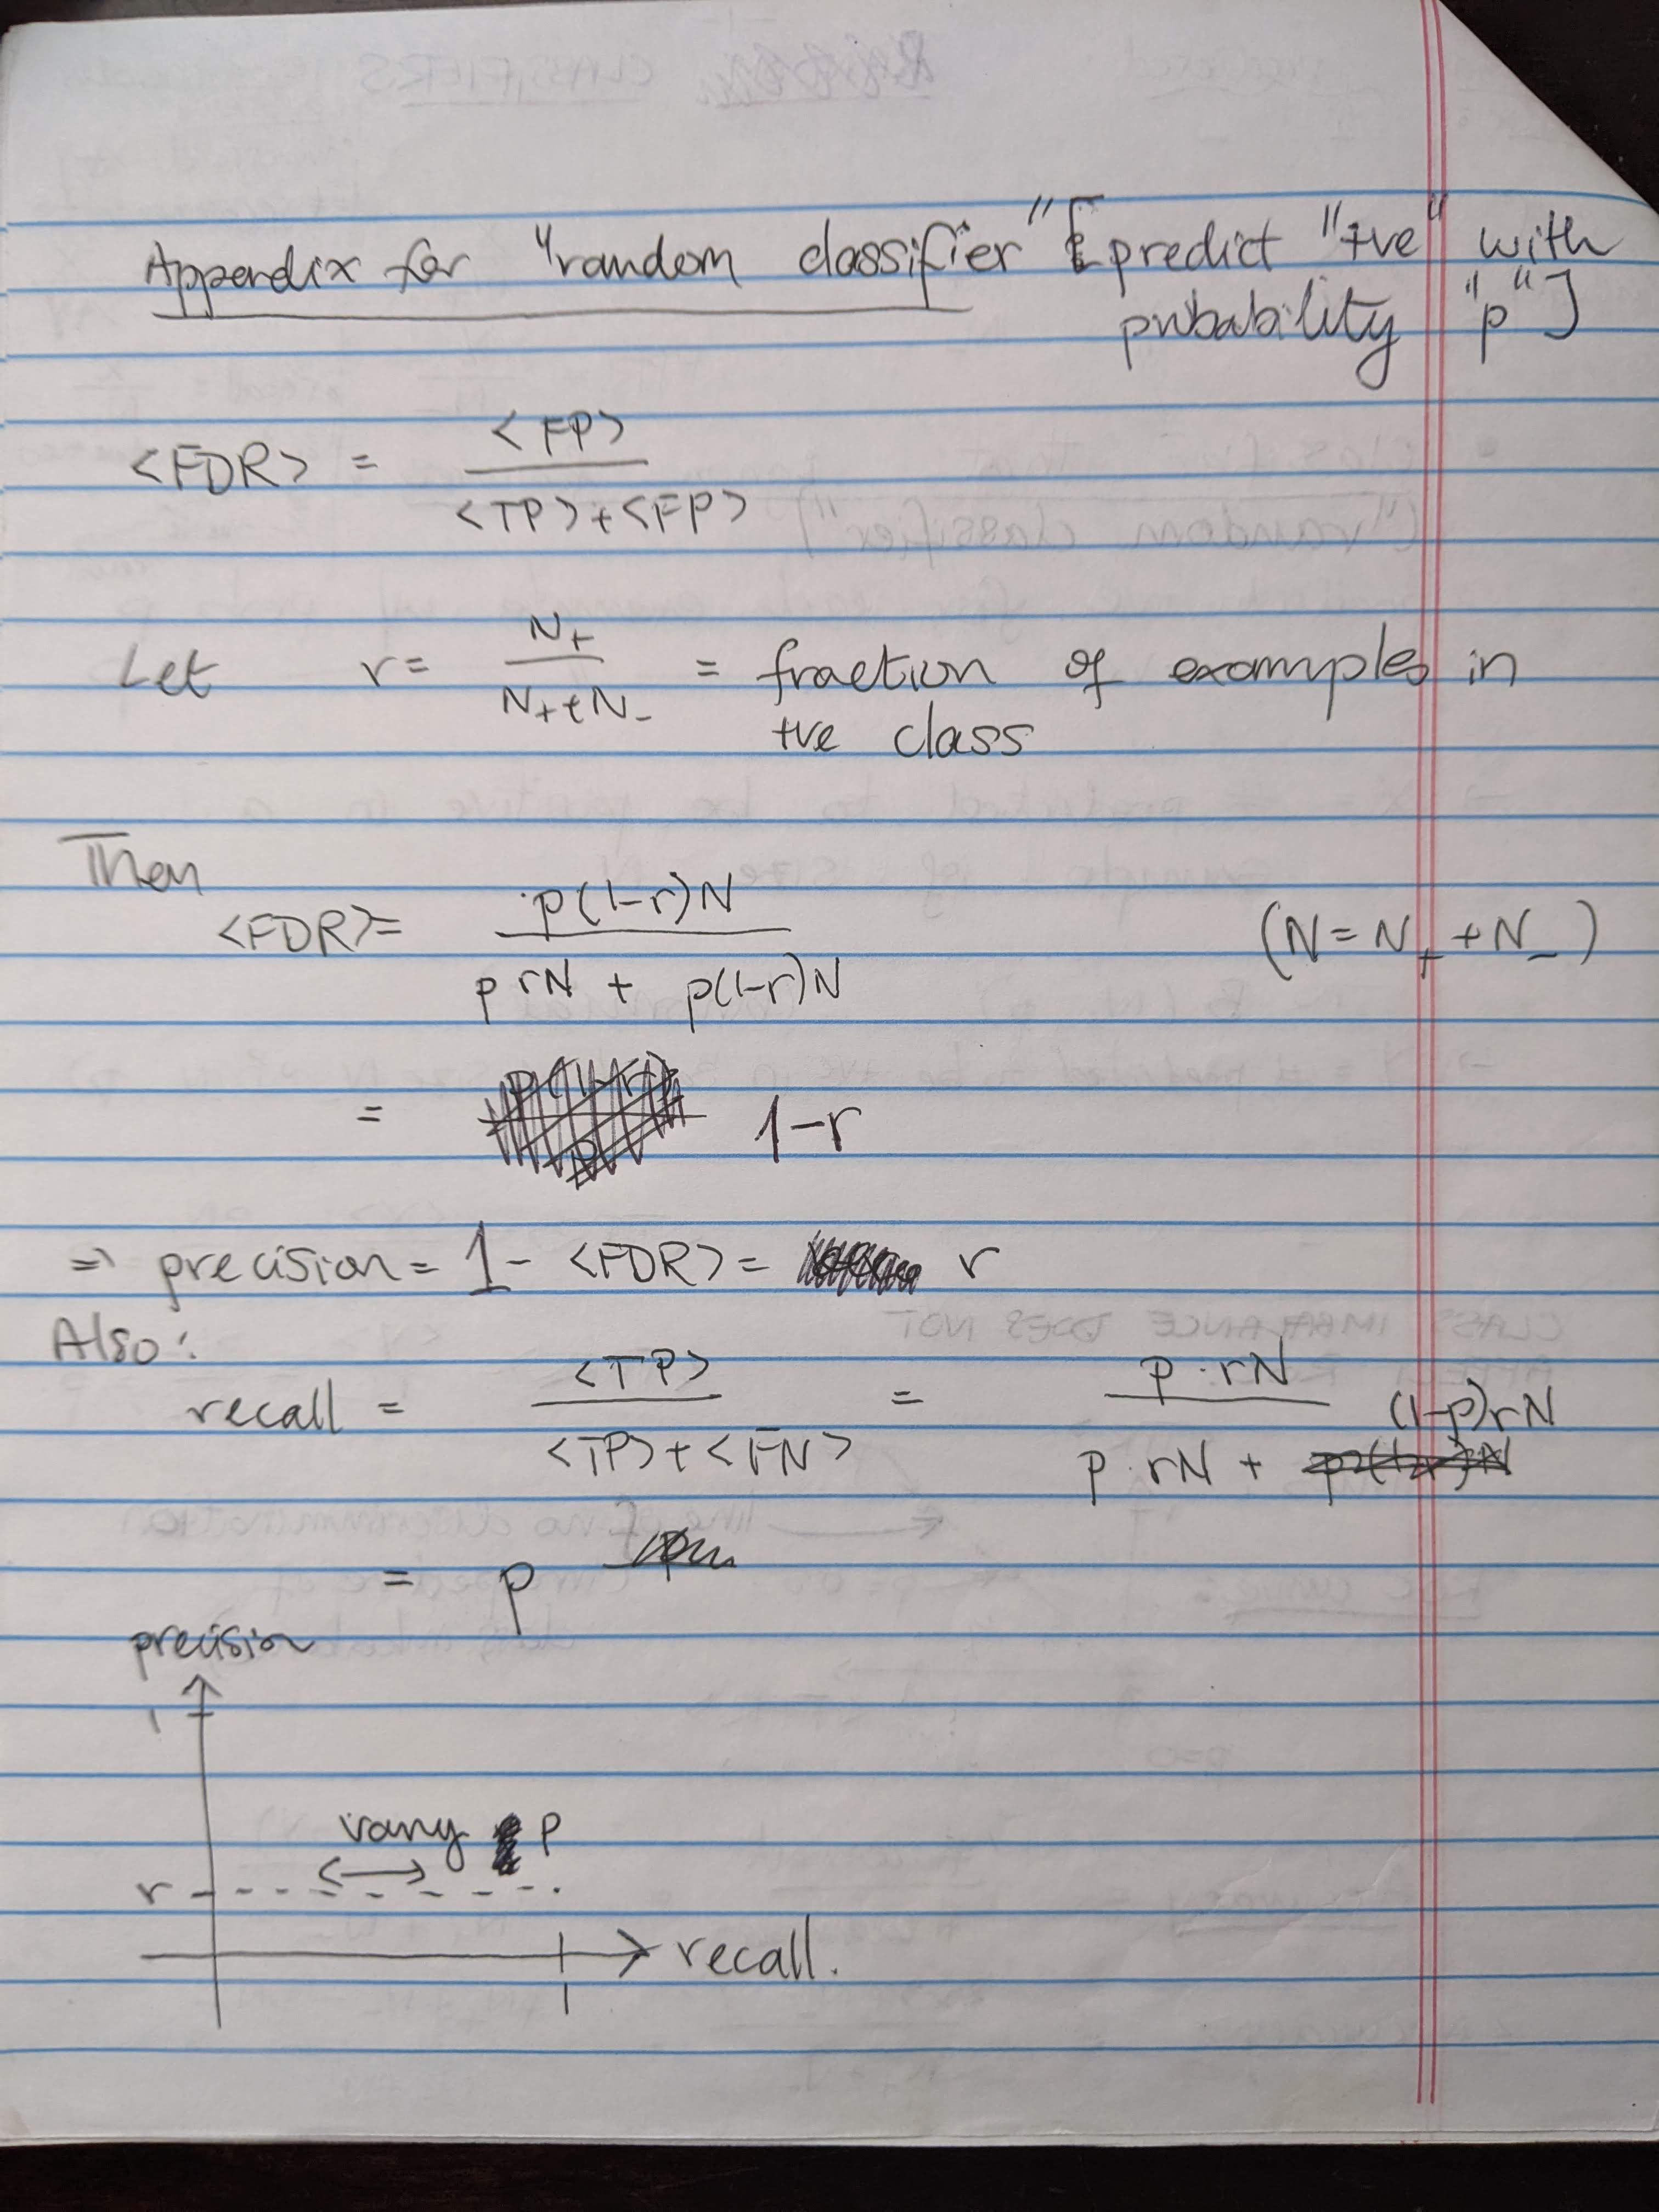

In [8]:
from IPython.display import Image # type: ignore
Image(filename='precision_recall_random_classifier.jpg', width=600)

## Background selection negatively impacts a Gnocchi-based classifier

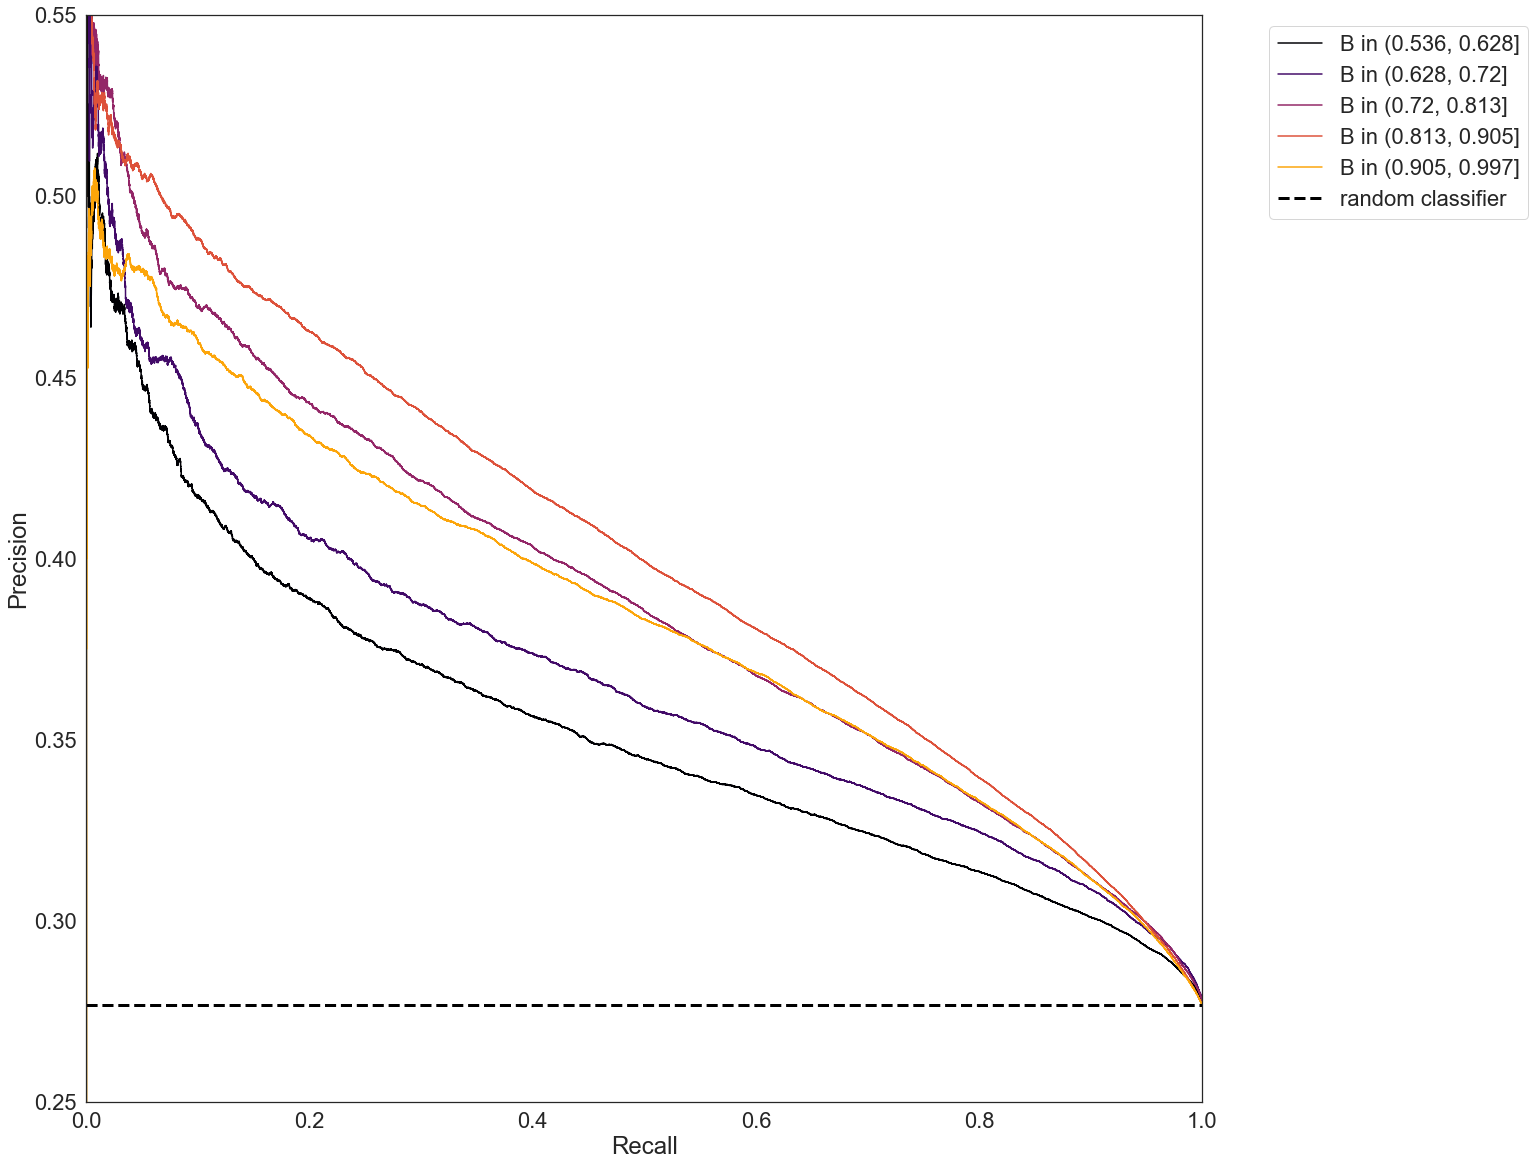

In [24]:
import matplotlib.cm as cm
from sklearn.metrics import auc, precision_recall_curve

def compute_positive_fraction(df, target):
  # this is "r" in the baseline-classifier theory 
  number_negative_examples = df[target].value_counts().loc[False]
  number_positive_examples = df[target].value_counts().loc[True]
  return number_positive_examples / (number_negative_examples + number_positive_examples)

def plot_random_classifier(df, target, color, axis):
  r = compute_positive_fraction(df, target)
  axis.plot([0, 1], [r, r], linestyle='--', linewidth=3, color=color, label='random classifier')  

def downsample(df):
  group_columns = ['B_bin']
  positive_class_sizes = df.groupby(group_columns)['window overlaps enhancer'].apply(lambda ser: ser.value_counts()[True])
  negative_class_sizes = df.groupby(group_columns)['window overlaps enhancer'].apply(lambda ser: ser.value_counts()[False])  
  positive_to_negative_ratios = positive_class_sizes/negative_class_sizes
  min_positive_to_negative_ratio = positive_to_negative_ratios.min()

  def downsample_positive_class(group):
    negative_class = group[group['window overlaps enhancer'] == False]
    negative_class_size = len(negative_class)
    positive_class = group[group['window overlaps enhancer'] == True]
    new_positive_class_size = int(min_positive_to_negative_ratio*negative_class_size)
    positive_class_downsampled = positive_class.sample(new_positive_class_size)
    return pd.concat([positive_class_downsampled, negative_class])
  
  df_downsampled = df.groupby(group_columns).apply(downsample_positive_class).reset_index(drop=True)

  return df_downsampled

def preprocess(df, number_B_bins): 
  df = df.copy() 
  df = df[df['window overlaps merged_exon'] == False] # strictly non-exonic windows
  df['B_bin'] = pd.cut(df['B'], bins=number_B_bins) 
  df = downsample(df)
  return df 

def find_shift_value(pairs):
  n = len(pairs)
  left, right = 0, 100
  while right - left > 1:  
    mid = (left + right) / 2
    count_below_diag = sum(x - mid > y for x, y in pairs)
    if count_below_diag >= n / 2:
      left = mid
    else:
      right = mid
  return (left + right) / 2  

def correct_gnocchi(df): 
  pairs = [(x, y) for x, y in zip(df['N_expected'], df['N_observed'])]
  shift_value = find_shift_value(pairs)
  df['N_expected_BGS_corrected'] = df['N_expected'] - shift_value
  df['gnocchi_BGS_corrected'] = (df['N_expected_BGS_corrected'] - df['N_observed']) / np.sqrt(df['N_expected_BGS_corrected'])
  return df

def correct_gnocchi_by_bin(df): 
  dfs = [correct_gnocchi(group) for _, group in df.groupby('B_bin')]
  return pd.concat(dfs)

def plot_precision_recall_all(df, number_B_bins, xlim=(0, 1), ylim=(0.25, 0.55), plot_corrected=False): 
  df = preprocess(df, number_B_bins)

  if plot_corrected:
    df = correct_gnocchi_by_bin(df)

  fig, ax = plt.subplots(figsize=(20, 20))
  cmap = cm.get_cmap('inferno')

  for i, b_bin in enumerate(sorted(df['B_bin'].unique())): 
    df_b_bin = df[df['B_bin'] == b_bin]
    color = cmap(i / number_B_bins)
    targets, scores = df_b_bin['window overlaps enhancer'], df_b_bin['gnocchi']
    precision, recall, _ = precision_recall_curve(targets, scores)
    plt.plot(recall, precision, color=color, linestyle='-', label=f'B in {b_bin}')
    if plot_corrected:
      scores_corrected = df_b_bin['gnocchi_BGS_corrected']
      precision_corrected, recall_corrected, _ = precision_recall_curve(targets, scores_corrected)
      plt.plot(recall_corrected, precision_corrected, color=color, linestyle='--', label=f'B in {b_bin}')

  plot_random_classifier(
    df, 
    target='window overlaps enhancer', 
    color='black', 
    axis=ax,
  )
  ax.grid(False)
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
  ax.set_xlabel('Recall')
  ax.set_ylabel('Precision')
  ax.set_xlim(xlim)
  ax.set_ylim(ylim)

plot_precision_recall_all(WINDOWS, number_B_bins=5)

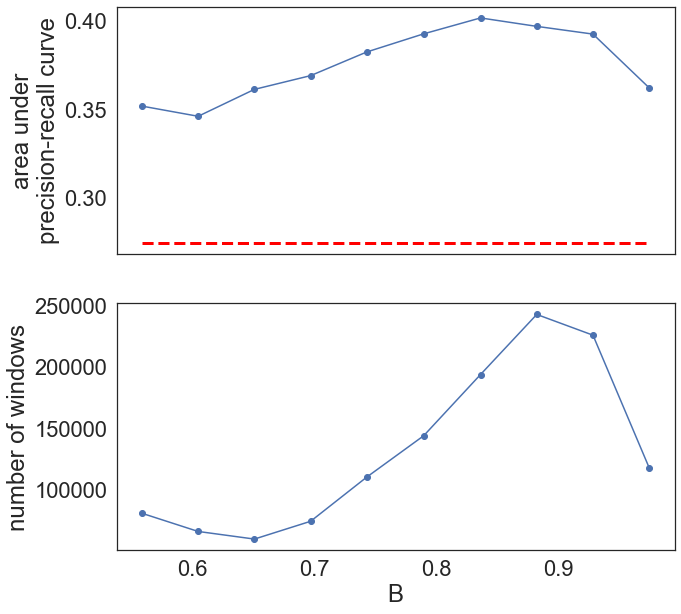

In [25]:
def plot_auPRC_all(df, number_B_bins): 
  df = preprocess(df, number_B_bins)

  Bbin_to_number_windows = df['B_bin'].value_counts()

  b_bin_mids, auPRCs, number_windows = [], [], []
  for b_bin in sorted(df['B_bin'].unique()): 
    df_b_bin = df[df['B_bin'] == b_bin]

    targets, scores = df_b_bin['window overlaps enhancer'], df_b_bin['gnocchi']
    precision, recall, _ = precision_recall_curve(targets, scores)

    b_bin_mids.append(b_bin.mid)
    auPRCs.append(auc(recall, precision))
    number_windows.append(Bbin_to_number_windows.loc[b_bin])

  r = compute_positive_fraction(df, target='window overlaps enhancer')

  fig, axs = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

  axs[0].plot(b_bin_mids, auPRCs, marker='o')
  axs[0].plot([min(b_bin_mids), max(b_bin_mids)], [r, r], linestyle='--', linewidth=3, color='red')  
  axs[0].set_ylabel('area under\nprecision-recall curve')
    
  axs[1].plot(b_bin_mids, number_windows, marker='o')
  axs[1].set_xlabel('B')
  axs[1].set_ylabel('number of windows')

plot_auPRC_all(WINDOWS, number_B_bins=10)

## Correcting Gnocchi (by shifting N_expected downwards by a B-dependent amount) does NOT significantly impact classifier performance

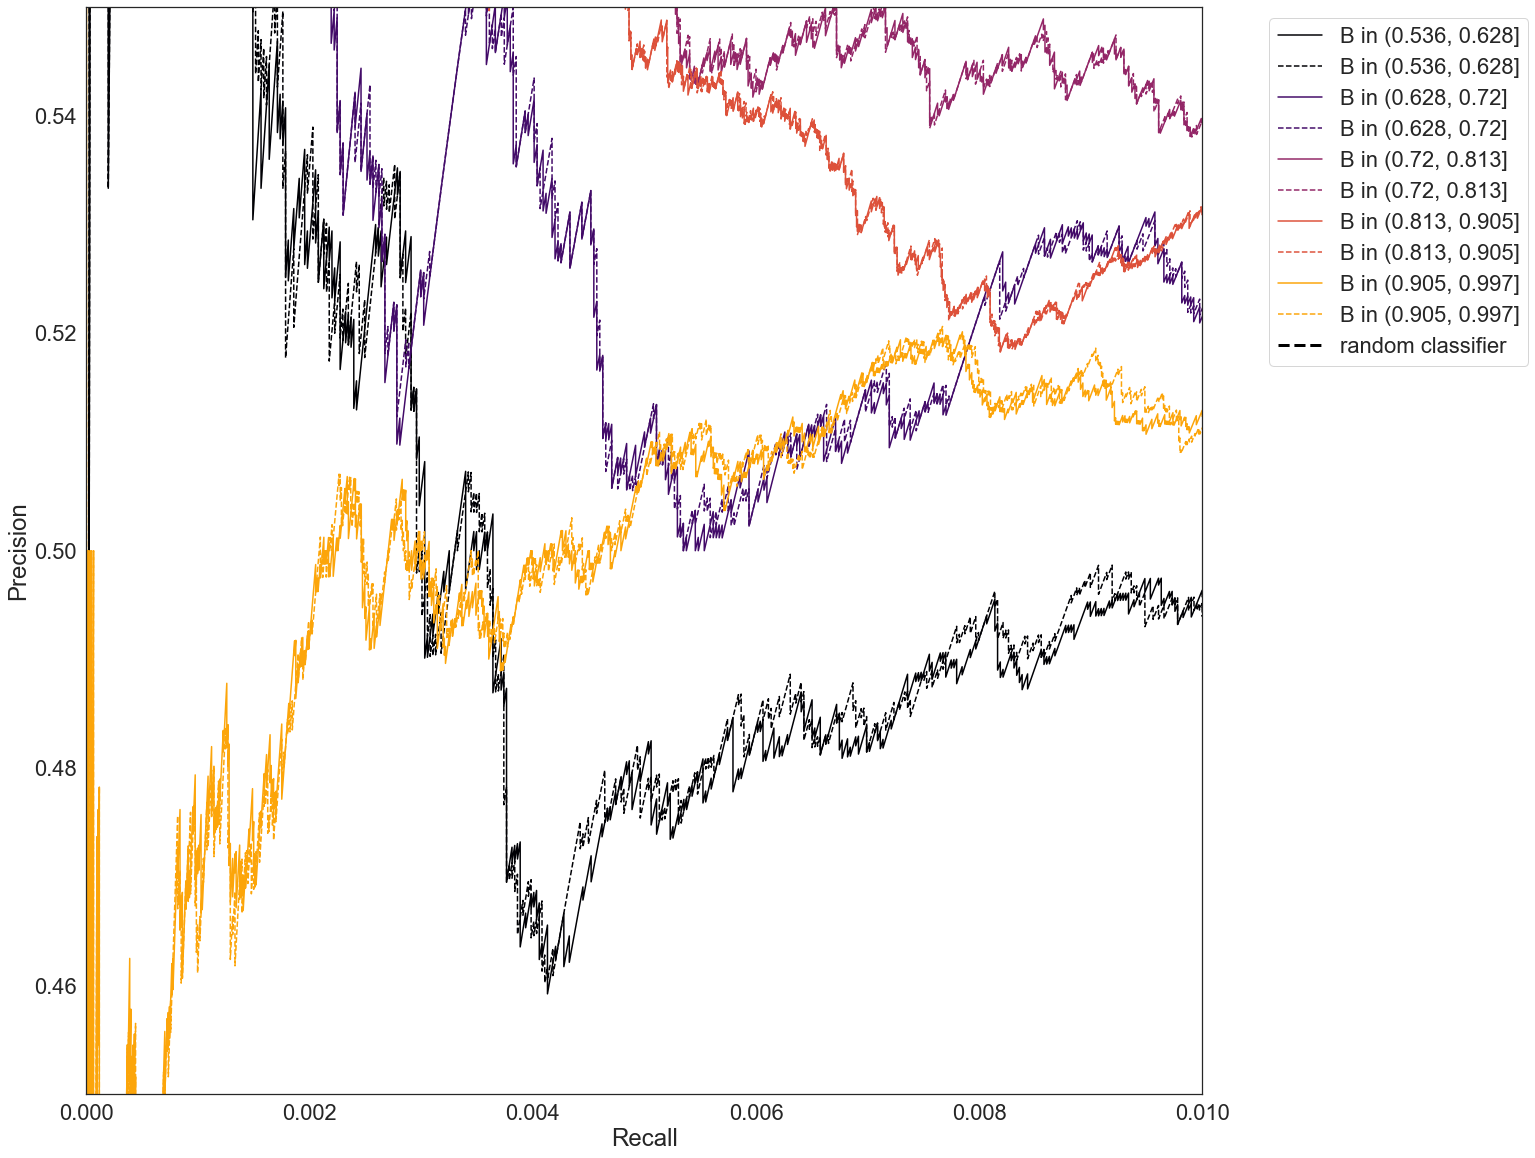

In [26]:
plot_precision_recall_all(WINDOWS, number_B_bins=5, xlim=(0, 0.01), ylim=(0.45, 0.55), plot_corrected=True)

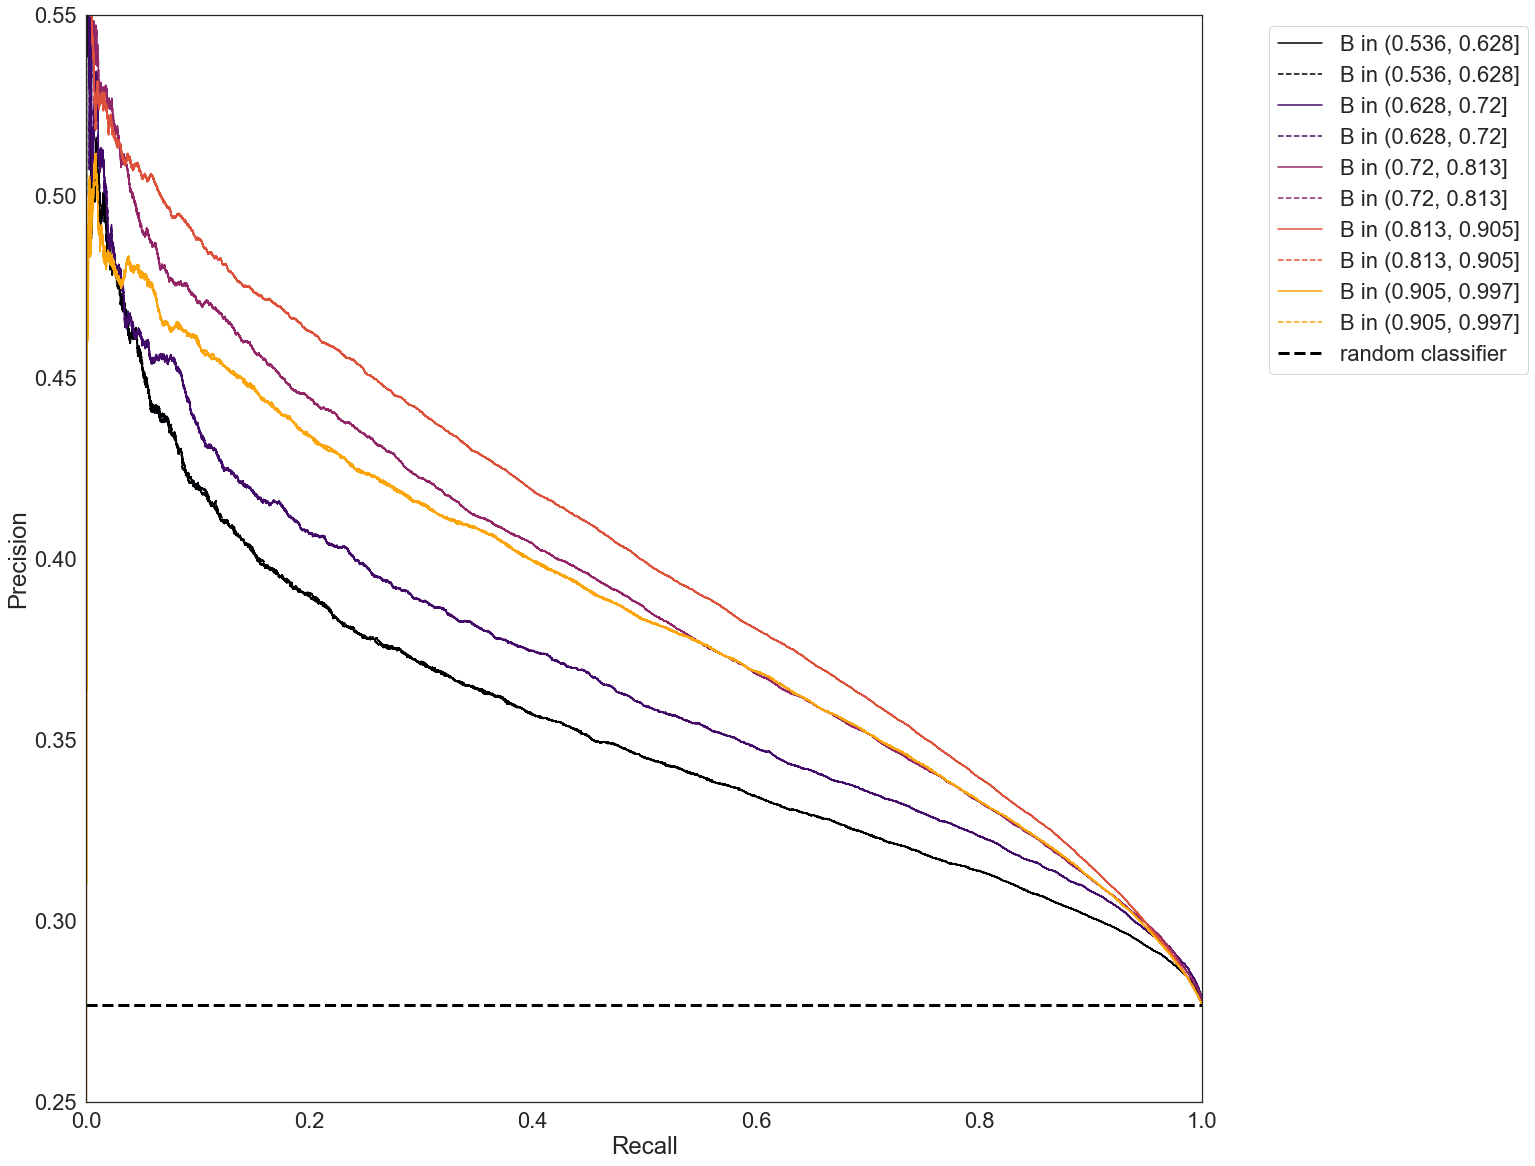

In [27]:
plot_precision_recall_all(WINDOWS, number_B_bins=5, plot_corrected=True)